In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser 
from datetime import datetime

tps = pd.read_csv('../csv/temperatures/temperature_2018.csv', encoding='utf-8', sep=';')

#Select only Lambrate's station (id=2)
tps.drop(tps.index[(tps["Zone"]!="Lambrate")], axis=0, inplace=True) 

tps

#Select only Data from january to march


tps.drop(tps.index[12960:],inplace=True)

#Convert into datetime type
tps['Data-Ora'] = pd.to_datetime(tps['Data-Ora'])
tps['Media'] =pd.to_numeric(tps['Media'].str.replace(',','.'), errors='coerce')

#Group by date
tps_day_medium = tps.set_index('Data-Ora').groupby(pd.Grouper(freq='D'))

#Calculate daily temperatures mean
tps_day_medium = tps_day_medium['Media'].mean().reset_index().rename(columns={"Data-Ora":"data"})

tps_day_medium

,data,Media
0,2018-01-01,3.312500
1,2018-01-02,6.391667
2,2018-01-03,-1.258333
3,2018-01-04,13.145833
4,2018-01-05,14.691667
...,...,...
360,2018-12-27,2.066667
361,2018-12-28,3.200000
362,2018-12-29,4.062500
363,2018-12-30,5.854167


In [2]:
inq=pd.read_csv('../csv/pollution_detection/ds459_qaria_datoariagiornostazione_year-2018.csv', encoding='utf-8', sep=';')

#Converte into datetime type
inq['data'] = pd.to_datetime(inq['data'])

#Select only Data from january to march
inq.drop(inq.index[1550:],inplace=True)

#Select only NO2 pollution
inq.drop(inq.index[(inq["inquinante"]!="NO2")], axis=0, inplace=True)

#Delete not a number values
inq.dropna(subset=["valore"], axis=0, inplace=True)

#Select only Lambrate's station (id=2)
inq.drop(inq.index[(inq["stazione_id"]!=2)], axis=0, inplace=True)

In [3]:
inq

,stazione_id,data,inquinante,valore
11,2,2018-01-03,NO2,70.0
36,2,2018-01-04,NO2,72.0
61,2,2018-01-05,NO2,76.0
86,2,2018-01-08,NO2,46.0
111,2,2018-01-09,NO2,38.0
...,...,...,...,...
1436,2,2018-03-26,NO2,100.0
1461,2,2018-03-27,NO2,108.0
1486,2,2018-03-28,NO2,102.0
1511,2,2018-03-29,NO2,71.0


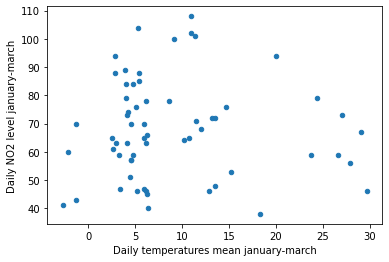

In [4]:
#Inner-join between 'data' from inq and tps_day_medium
result=pd.merge(inq,tps_day_medium,on='data')

result.plot.scatter(x='Media', y='valore')

plt.xlabel('Daily temperatures mean january-march')
plt.ylabel('Daily NO2 level january-march')
plt.show()

In [5]:
def weather_pollutant(pollutant, station_id, weather_attribute, date1, date2):
    
    inq = pd.read_csv('../csv/pollution_detection/ds459_qaria_datoariagiornostazione_year-2018.csv', encoding='utf-8', sep=';')
    weather = pd.read_csv('../csv/weathermilan_ilmeteo/Milano-2018.csv', encoding='utf-8', sep=',')
    
    #Convert into datetime type
    inq['data'] = pd.to_datetime(inq['data'])
    weather['DATA'] = pd.to_datetime(weather['DATA'])
    
    #Select only Data from date1 to date2
    inq.drop(inq.index[(inq["data"] < date1)], axis=0, inplace=True)
    inq.drop(inq.index[(inq["data"] > date2)], axis=0, inplace=True)
    weather.drop(weather.index[(weather["DATA"] < date1)], axis=0, inplace=True)
    weather.drop(weather.index[(weather["DATA"] > date2)], axis=0, inplace=True)
    
    #Select only NO2 pollution
    inq.drop(inq.index[(inq["inquinante"]!=pollutant)], axis=0, inplace=True)
    
    #Delete not a number values
    inq.dropna(subset=["valore"], axis=0, inplace=True)
    
    #Select only Lambrate's station (id=2)
    inq.drop(inq.index[(inq["stazione_id"]!=station_id)], axis=0, inplace=True)
    
    weather2 = weather.rename(columns={"DATA":"data"})
    
    
    #Inner-join between 'data' from inq and weather2
    result=pd.merge(inq,weather2,on='data')

    result.plot.scatter(x=weather_attribute, y='valore')

    plt.xlabel('Weather attribute: '+weather_attribute)
    plt.ylabel('Pollutant: '+pollutant)
    plt.show()

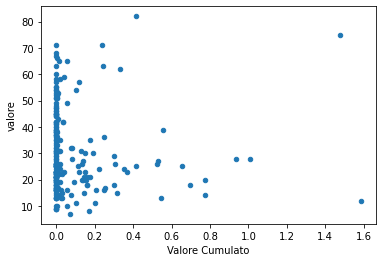

In [16]:
def rain():
    milan_weather = pd.read_csv('../csv/precipitazioni.csv', encoding='utf-8', sep=',')
    
    #Convert into datetime type
    milan_weather['Data-Ora'] = pd.to_datetime(milan_weather['Data-Ora'])
    
    #Delete not a number values
    milan_weather.dropna(subset=["Valore Cumulato"], axis=0, inplace=True)    
    
    #Group by date
    milan_weather_day_medium = milan_weather.set_index('Data-Ora').groupby(pd.Grouper(freq='D'))

    #Calculate daily temperatures mean
    milan_weather_day_medium = milan_weather_day_medium['Valore Cumulato'].mean().round(7).reset_index().rename(columns={"Data-Ora":"data"})
    

    
    return milan_weather_day_medium
s=rain()

inq = pd.read_csv('../csv/pollution_detection/ds459_qaria_datoariagiornostazione_year-2018.csv', encoding='utf-8', sep=';')

#Convert into datetime type
inq['data'] = pd.to_datetime(inq['data'])

#Select only NO2 pollution
inq.drop(inq.index[(inq["inquinante"]!="PM10")], axis=0, inplace=True)
s2 = s.rename(columns={"Data-Ora":"data"})

#Delete not a number values
inq.dropna(subset=["valore"], axis=0, inplace=True)
    
#Select only Lambrate's station (id=2)
inq.drop(inq.index[(inq["stazione_id"]!=2)], axis=0, inplace=True)


#Inner-join between 'data' from inq and tps_day_medium
result = inq.set_index('data').join(s2.set_index('data'))
result.plot.scatter(x='Valore Cumulato', y='valore')

plt.show()

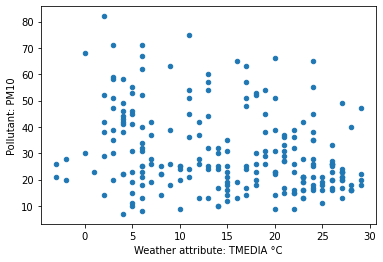

In [7]:
weather_pollutant("PM10", 2, "TMEDIA °C", "2018-01-03", "2018-12-31")

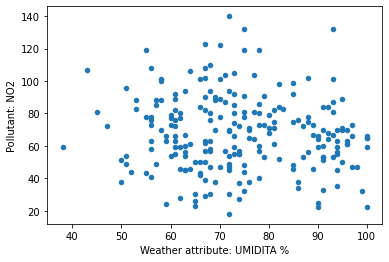

In [8]:
weather_pollutant("NO2", 2, "UMIDITA %", "2018-01-03", "2018-12-31")

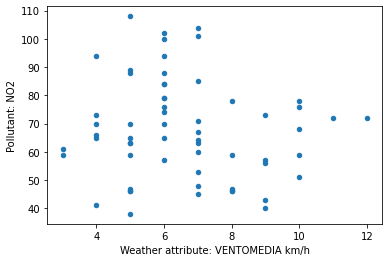

In [9]:
weather_pollutant("NO2", 2, "VENTOMEDIA km/h", "2018-01-03", "2018-03-30")

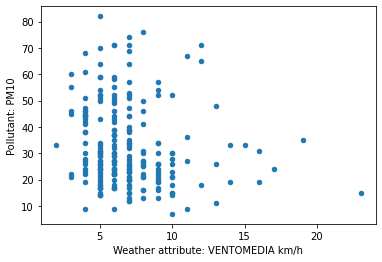

In [10]:
weather_pollutant("PM10", 7, "VENTOMEDIA km/h", "2018-01-03", "2018-12-31")

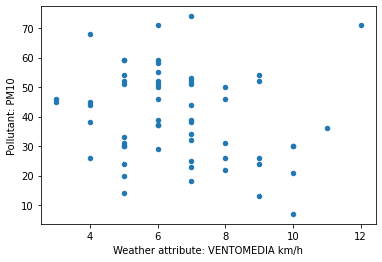

In [11]:
weather_pollutant("PM10", 7, "VENTOMEDIA km/h", "2018-01-03", "2018-03-30")

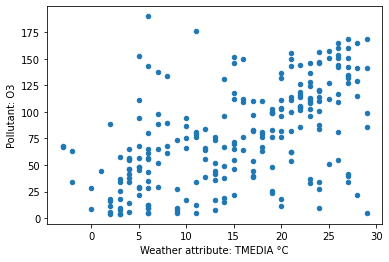

In [12]:
weather_pollutant("O3", 7, "TMEDIA °C", "2018-01-01", "2018-12-31")

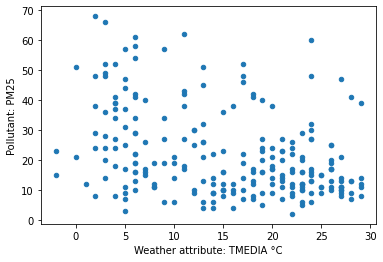

In [13]:
weather_pollutant("PM25", 6, "TMEDIA °C", "2018-01-01", "2018-12-31")

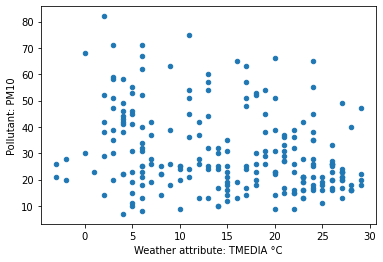

In [14]:
weather_pollutant("PM10", 2, "TMEDIA °C", "2018-01-03", "2018-12-31")

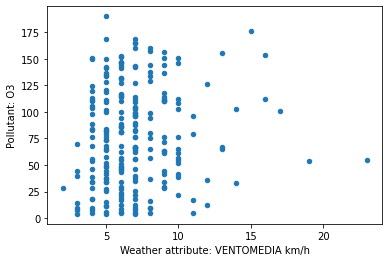

In [15]:
weather_pollutant("O3", 7, "VENTOMEDIA km/h", "2018-01-01", "2018-12-31")